In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
fh = open("malus-data.txt", "r")
data = list(fh.read().splitlines())
data = [list(map(float, e.strip().split())) for e in data]
DIC = {}
for e in data:
    DIC[e[0]] = e[1]
data = [[e, DIC[e]] for e in DIC.keys()]
data = np.array([np.array(e) for e in data])
# data = np.array([np.array(e) for e in data if e[0] % 10 == 0])

In [3]:
def f1(x, a, b, c):
    return a + b * np.cos(np.pi*(x - c)/180)**2
def f2(x, a, b, c):
    return a + b * np.cos(np.pi*(x - c)/180)**4

In [4]:
popt1, pcov1 = curve_fit(f1, data[:,0], data[:,1])
popt2, pcov2 = curve_fit(f2, data[:,0], data[:,1])
print(f"The fitting paramters for the function are {popt1}")

The fitting paramters for the function are [  13.78675986   58.22703584 -916.77783003]


In [5]:
norm_data = np.array([np.array([np.cos(np.pi*(x - popt1[2])/180), np.cos(np.pi*(x - popt1[2])/180)**2, (y - popt1[0]) / popt1[1]]) for x,y in data])
x_s = np.linspace(1,360, 1000)
x1 = np.linspace(np.min(norm_data[:,1]),np.max(norm_data[:,1]), 1000)
x2 = np.linspace(np.min(norm_data[:,2]),np.max(norm_data[:,2]), 1000)

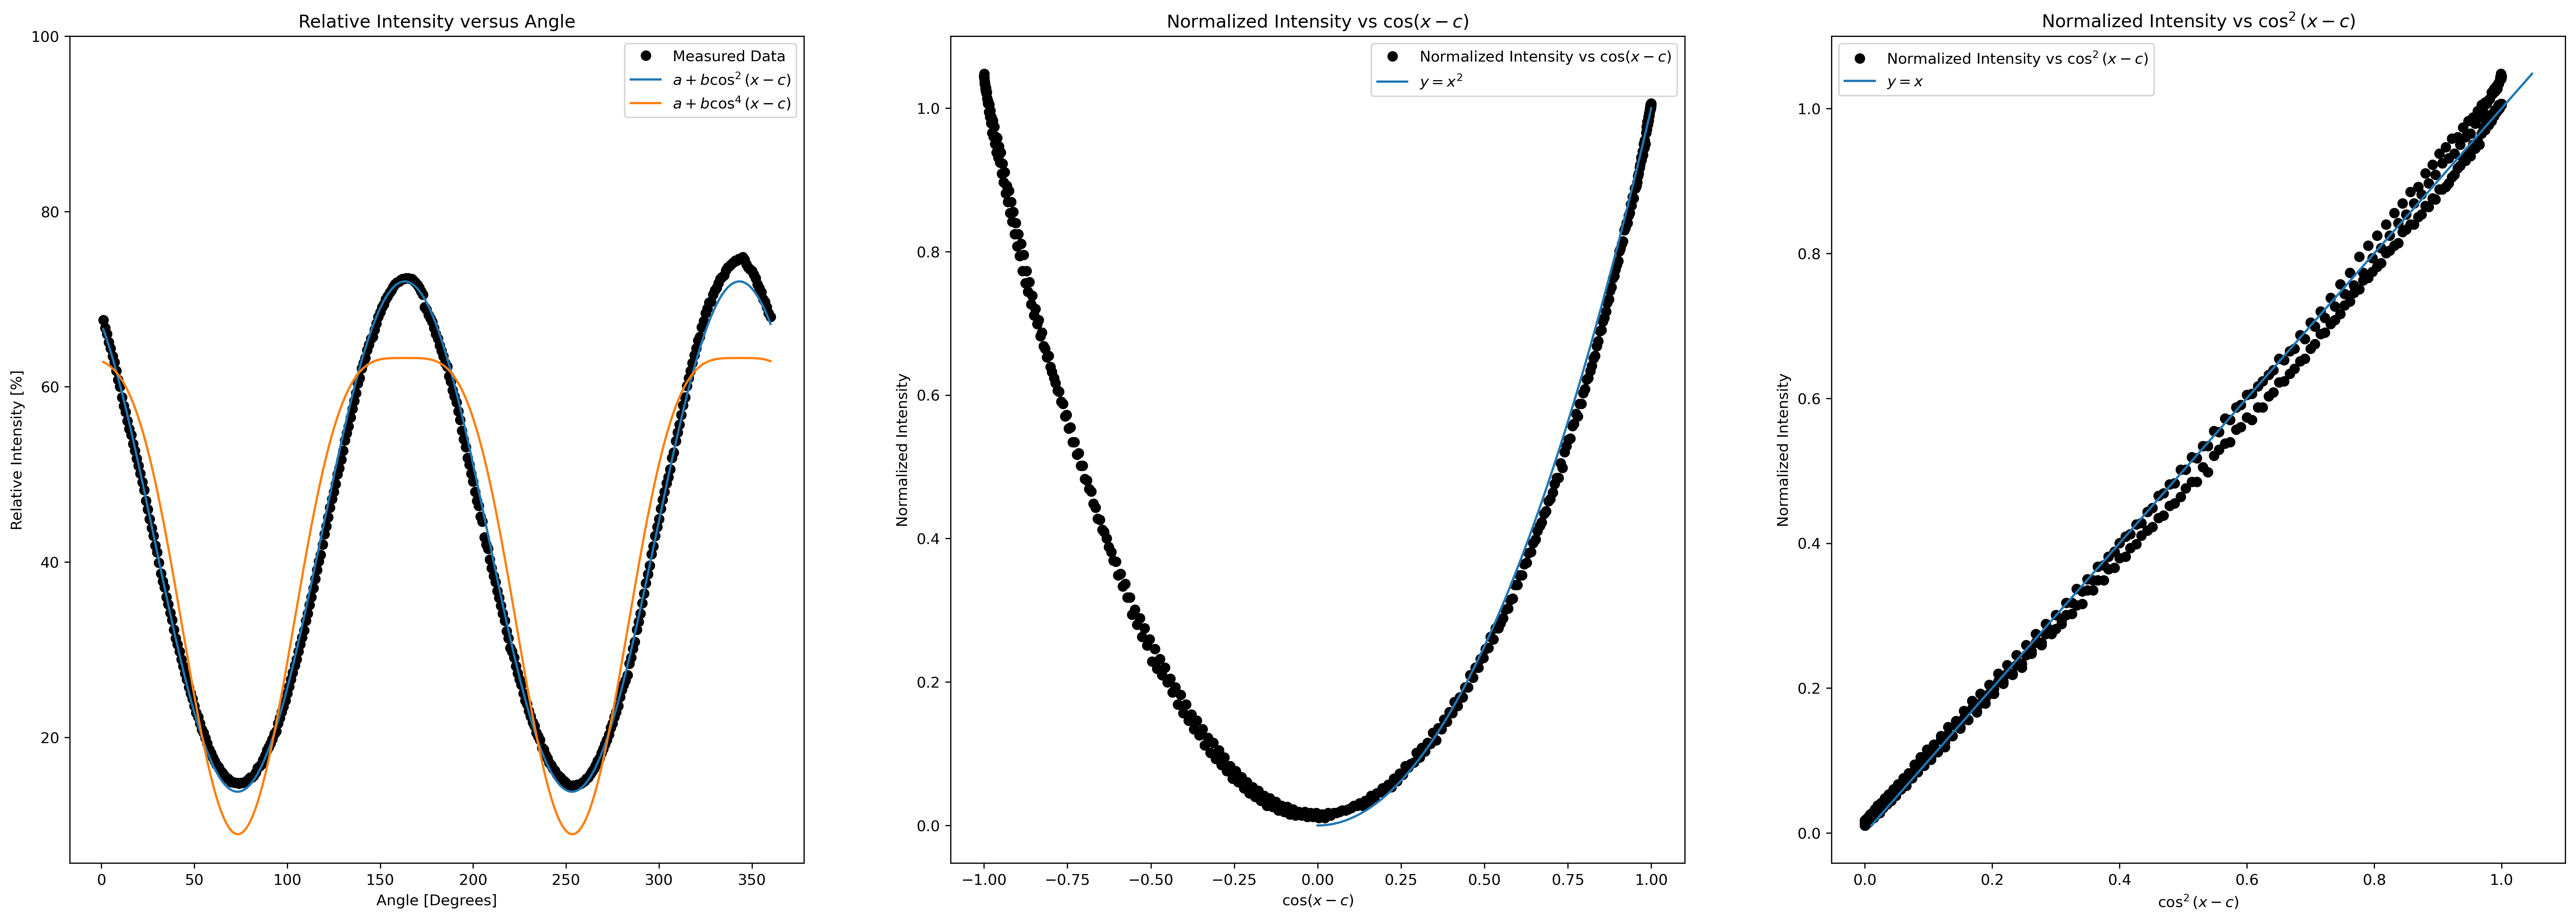

In [6]:
fig, axes = plt.subplots(1, 3, dpi=300, figsize=(30, 10))

ax = axes[0] 
ax.plot(data[:,0], data[:,1], "ko", label="Measured Data")
ax.plot(x_s, f1(x_s, popt1[0], popt1[1], popt1[2]), label=r"$a + b \cos^2(x - c)$")
ax.plot(x_s, f2(x_s, popt2[0], popt2[1], popt2[2]), label=r"$a + b \cos^4(x - c)$")
ax.set_title("Relative Intensity versus Angle")
ax.set_xlabel("Angle [Degrees]")
ax.set_ylabel("Relative Intensity [%]")
ax.set_ylim(top=100)
ax.legend(loc="upper right")

ax = axes[1]
ax.plot(norm_data[:, 0], norm_data[:, 2], "ko", label=r"Normalized Intensity vs $\cos(x - c)$")
ax.plot(x1, x1**2, label="$y = x^2$")
ax.set_title(r"Normalized Intensity vs $\cos(x-c)$")
ax.set_xlabel(r"$\cos(x-c)$")
ax.set_ylabel("Normalized Intensity")
ax.legend(loc="best")

ax = axes[2]
ax.plot(norm_data[:, 1], norm_data[:, 2], "ko", label=r"Normalized Intensity vs $\cos^2(x - c)$")
ax.plot(x2, x2, label="$y=x$")
ax.set_title(r"Normalized Intensity vs $\cos^2(x-c)$")
ax.set_xlabel(r"$\cos^2(x-c)$")
ax.set_ylabel("Normalized Intensity")
ax.legend(loc="upper left")

fig.savefig("malus-plot.pdf")
